In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./moisture_csv.csv')

In [3]:
df

,time,adc,voltage
0,06-24-2023 23:12:34,20864,1.0473792629892424V


In [11]:
df[df.voltage == df.voltage.min()]

,time,adc,voltage
31,06:21:2023 19:26:06,7232,0.364166


In [10]:
df.voltage.min()

0.3641657129777981

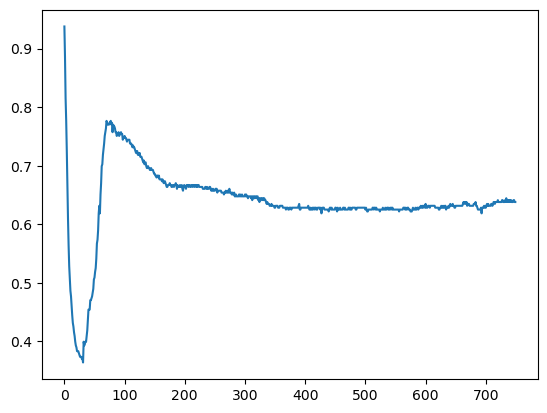

In [5]:
plt.plot(df.index, df.voltage)
plt.show()

In [43]:
start = pd.Timestamp('2023-06-18 13:49:49')
start

Timestamp('2023-06-18 13:49:49')

In [44]:
def get_time_from_index(index):
    return start + pd.Timedelta(3 * index, unit = 'm')

In [37]:
get_time_from_index(1)

Timestamp('2023-06-17 13:52:49')

In [45]:
df['full_time'] = pd.Series(df.index.map(lambda x: get_time_from_index(x)))

In [46]:
df

,time,adc,voltage,full_time
0,13:49:49,29824,1.501781,2023-06-18 13:49:49
1,13:52:49,28992,1.459886,2023-06-18 13:52:49
2,13:55:49,27072,1.363204,2023-06-18 13:55:49
3,13:58:49,25600,1.285859,2023-06-18 13:58:49
4,14:01:50,23808,1.198846,2023-06-18 14:01:49
...,...,...,...,...
1456,14:39:06,56896,2.832758,2023-06-21 14:37:49
1457,14:42:06,57664,2.903658,2023-06-21 14:40:49
1458,14:45:06,57920,2.916548,2023-06-21 14:43:49
1459,14:48:07,58240,2.929439,2023-06-21 14:46:49


In [47]:
monday_start = pd.Timestamp('2023-06-19 00:00:00')
monday_end = pd.Timestamp('2023-06-19 23:59:00')

In [48]:
df_monday = df[(df['full_time'] >= monday_start) & (df['full_time'] <= monday_end)]

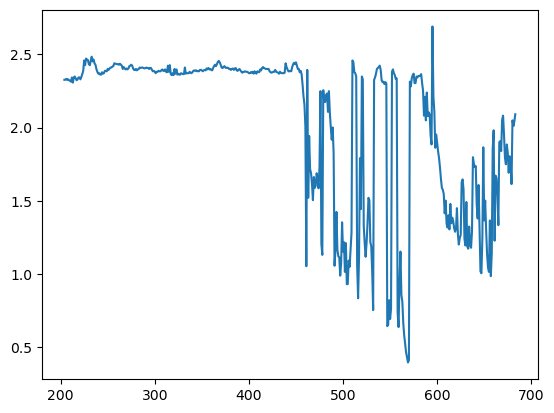

In [49]:
plt.plot(df_monday.index, df_monday.voltage)
plt.show()

In [22]:
tuesday_start = monday_end + 1
tuesday_end = tuesday_start + 480

In [23]:
df_tuesday = df.iloc[tuesday_start:tuesday_end]

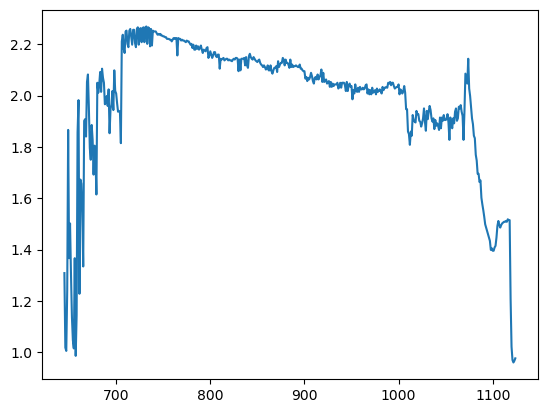

In [24]:
plt.plot(df_tuesday.index, df_tuesday.voltage)
plt.show()

In [50]:
wednesday_start = pd.Timestamp('2023-06-21 00:00:00')
wednesday_end = pd.Timestamp('2023-06-21 15:00:00')

In [51]:
df_wednesday = df[(df['full_time'] >= wednesday_start) & (df['full_time'] <= wednesday_end)]

In [29]:
wednesday_start

1126

In [30]:
df.iloc[wednesday_start]

time       22:08:46
adc           19008
voltage    0.953921
Name: 1126, dtype: object

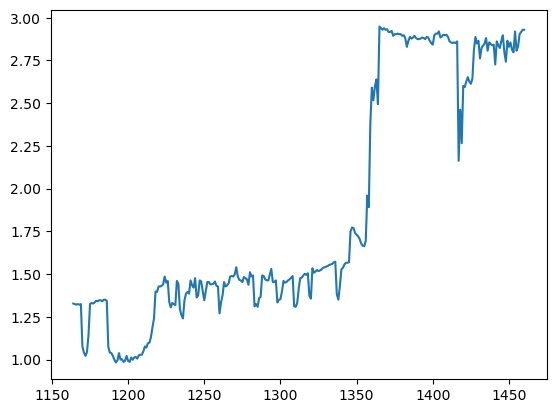

In [52]:
plt.plot(df_wednesday.index, df_wednesday.voltage)
plt.show()

In [14]:
df[df.adc == df.adc.min()]

,time,adc,voltage
569,18:17:17,7872,0.396393


In [11]:
df.adc.min()

7872

In [12]:
df.adc.max()

58560

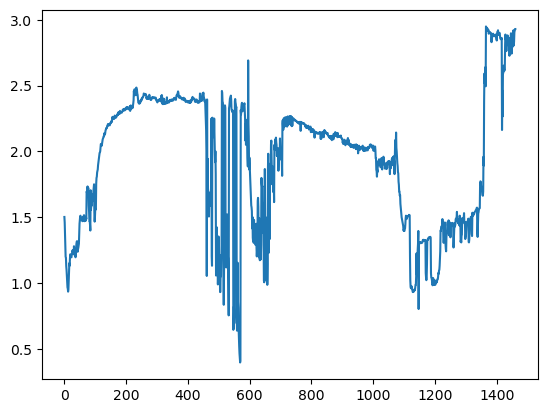

In [16]:
plt.plot(df.index, df.voltage)
plt.show()

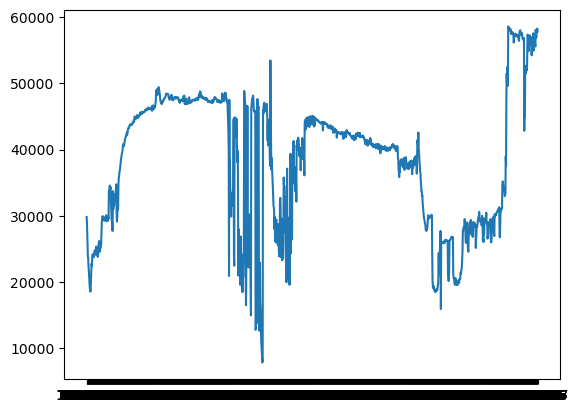

In [10]:
plt.plot(df.time, df.adc)
plt.show()